In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
df.skew()

C:\Users\seher\AppData\Local\Temp\ipykernel_9796\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Height    0.049369
Weight    0.032955
dtype: float64

## Let's check for the outliers and distribution 

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


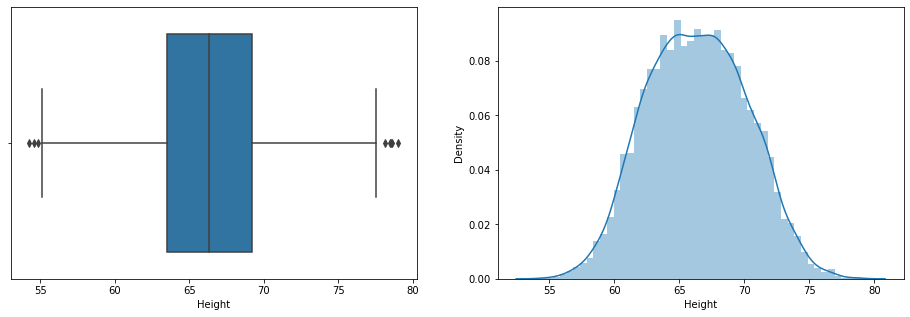

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['Height'])


plt.subplot(1,2,2)
sns.distplot(df['Height'])

plt.show()

C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


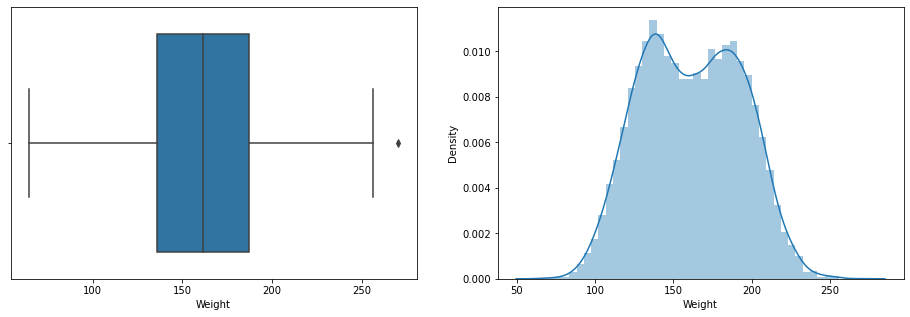

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['Weight'])


plt.subplot(1,2,2)
sns.distplot(df['Weight'])

plt.show()

### AS we can see many outliers in the height col so let's deal with it 
- Here we need to decide the quantile which we will be going to use as our max and min value 
- as we know that, in case of normal distribution, we need to choose somehow the same value from both side 
- One for maximum and one for minimum 

## We have to leave some amount of values from both sides 
for example:
- if we choose 95% from one side and than from the other side we need to choose 5 (same % value will get cut from the both sides)

#### We will be leaving 0.01 from both sides so the range is 0.99 and 0.01 

In [8]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [9]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

### the above finding are saying that the 0.01 percent ppl have hight less than 58.13 and 0.99% ppl have height below or equals to 74.78cm

- ### Let's find the outliers now 

In [10]:
df[(df['Height'] < lower_limit) | (df['Height'] > upper_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


# Trimmimg

In [11]:
new_df = df[(df['Height'] >= lower_limit) & (df['Height'] <= upper_limit)]

In [12]:
new_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


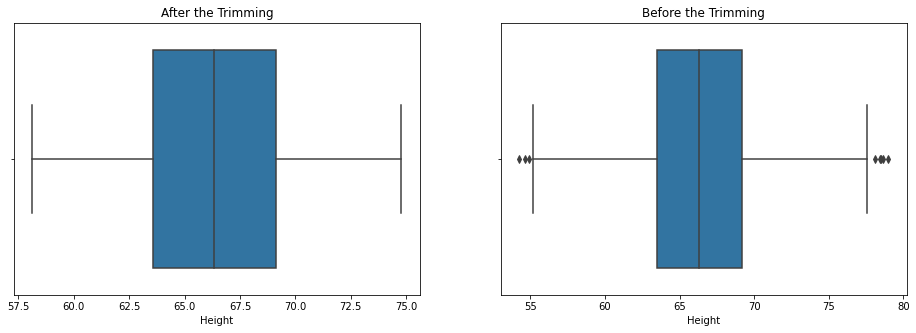

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(new_df['Height'])
plt.title("After the Trimming")


plt.subplot(1,2,2)
sns.boxplot(df['Height'])
plt.title("Before the Trimming")

plt.show()

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


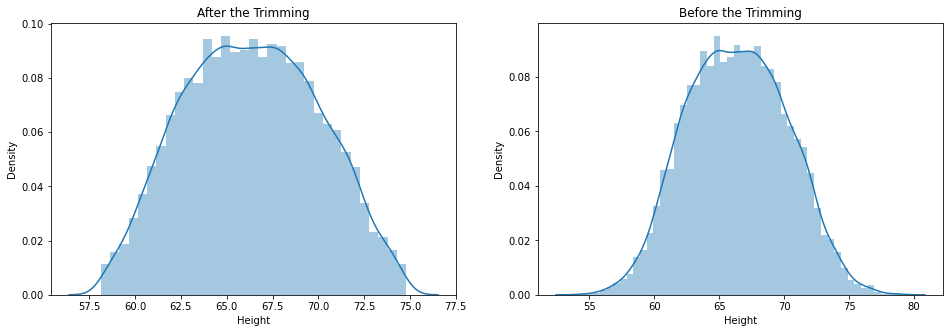

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['Height'])
plt.title("After the Trimming")


plt.subplot(1,2,2)
sns.distplot(df['Height'])
plt.title("Before the Trimming")

plt.show()

### Capping (capping in percentile method known as Winsorization)

In [19]:
df['Winsor_Height'] = np.where(df['Height'] >= upper_limit,
                               upper_limit, 
                               np.where(df['Height'] <= lower_limit, lower_limit, df['Height']))

In [20]:
df.head()

,Gender,Height,Weight,Winsor_Height
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105
3,Male,71.730978,220.042470,71.730978
4,Male,69.881796,206.349801,69.881796


C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\seher\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


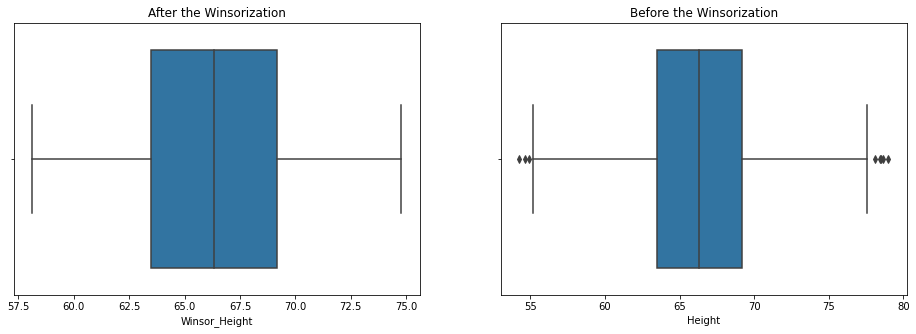

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['Winsor_Height'])
plt.title("After the Winsorization")


plt.subplot(1,2,2)
sns.boxplot(df['Height'])
plt.title("Before the Winsorization")

plt.show()

C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\seher\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


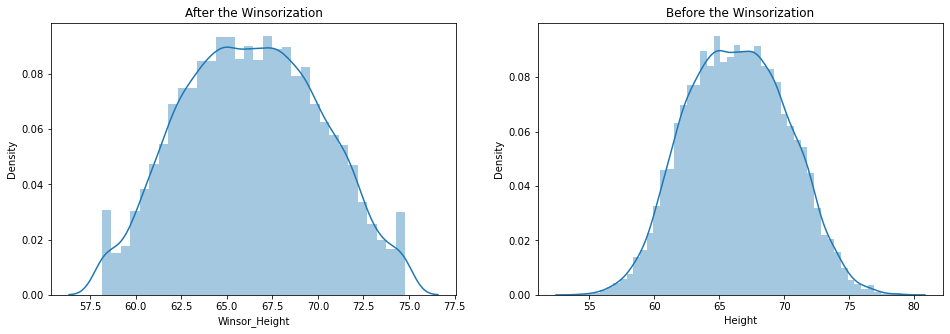

In [22]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Winsor_Height'])
plt.title("After the Winsorization")


plt.subplot(1,2,2)
sns.distplot(df['Height'])
plt.title("Before the Winsorization")

plt.show()